
# Amazon Review Analysis

<img src="Amazon_review.png" alt="Description" width="1500" height="400"/>

## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href='#Data Cleaning'>Data Cleaning</a></li>
    <li><a href='#Data Exploration'> Data Exploration</a></li>
    <li><a href='#conclusion'>Conclusion</a></li>
   
</ul>



<a id="#Introduction"></a>

## Introduction

The Amazon Review Dataset presented here comprises 1,465 product reviews, offering rich insights into customer opinions, product details, and pricing trends on the platform. This dataset spans 16 key attributes, including product metadata, user-generated content, and review-specific features.

Each entry includes essential fields such as:

Product details `(product_id, product_name, category, actual_price, discounted_price, discount_percentage)`

Customer reviews and sentiments `(rating, rating_count, review_title, review_content)`

User metadata `(user_id, user_name, review_id)`

Additional fields like `about_product`, `img_link`, and `product_link` that provide further context for each listing.

The data provides an excellent opportunity for exploratory data analysis (EDA), sentiment analysis, pricing pattern detection, and the evaluation of customer satisfaction levels across different product categories. By combining text analytics with structured data, we can derive meaningful insights into consumer behavior and product performance on Amazon.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
amazon_df = pd.read_csv('amazon.csv')

In [3]:
amazon_df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [4]:
amazon_df.shape

(1465, 16)

In [5]:
print(f"the dataset contains {amazon_df.shape[0]} rows and {amazon_df.shape[1]} columns")

the dataset contains 1465 rows and 16 columns


In [6]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

From the above we could see that 
* All columns are of type object, even those that should be numeric (e.g., prices, ratings)
* Missing Values: Only rating_count has 2 missing values.

<a id="#Data Cleaning"></a>
## Data Cleaning

 In this stage the following steps will be taken in order clean the data
 #### 1. Remove Unwanted Characters from Price Columns
 * Columns: discounted_price, actual_price
 * Remove currency symbols like ₹, commas, and convert to float.
 #### 2.Convert discount_percentage, rating, and rating_count to Numeric Types

* Remove currency symbols like ₹, commas, and convert to float.
* Convert rating and rating_count to float or int
#### 3.Handle Missing Values
* Check and handle missing values in rating_count (only column with nulls).
* Decide whether to fill, drop, or impute missing values.
#### 4. Drop Irrelevant Columns (if any)

* If columns like img_link or product_link are not needed for analysis, consider dropping them.


In [7]:
# copy data frame
amazon_df_copy = amazon_df.copy()

#### Handle Missing Values

In [8]:
amazon_df.dropna(inplace=True)

#### Convert Datatype and  Removing Unwanted Characters

In [9]:
# Remove % sign and convert to float
amazon_df['discount_percentage']=amazon_df['discount_percentage'].str.replace("%","").astype(float)

# Remove ₹ and commas, then convert to float
amazon_df['discounted_price']= amazon_df['discounted_price'].str.replace('₹',"").str.replace(',',"").astype(float)
amazon_df['actual_price']= amazon_df['actual_price'].str.replace('₹',"").str.replace(',',"").astype(float)

In [10]:
amazon_df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [11]:
# Replace | symbol with 1 and convert to float
amazon_df['rating']= amazon_df['rating'].str.replace('|',"1").astype(float)


In [12]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1463 non-null   object 
 1   product_name         1463 non-null   object 
 2   category             1463 non-null   object 
 3   discounted_price     1463 non-null   float64
 4   actual_price         1463 non-null   float64
 5   discount_percentage  1463 non-null   float64
 6   rating               1463 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1463 non-null   object 
 9   user_id              1463 non-null   object 
 10  user_name            1463 non-null   object 
 11  review_id            1463 non-null   object 
 12  review_title         1463 non-null   object 
 13  review_content       1463 non-null   object 
 14  img_link             1463 non-null   object 
 15  product_link         1463 non-null   object

In [13]:

number_of_categories=amazon_df['category'].nunique()
print("There are {} distinct product categories in your".format(number_of_categories))


There are 211 distinct product categories in your


In [14]:
#renames the column discount_percentage to discount_rate in your amazon_df DataFrame
amazon_df.rename(columns={"discount_percentage":"discount_rate"},inplace=True)

In [15]:
#Convert to decimal
amazon_df['discount_rate']= amazon_df['discount_rate']/100

In [16]:
#remove whitespaces using strip() function
amazon_df['category'] = amazon_df['category'].str.strip()
amazon_df['review_title'] = amazon_df['review_title'].str.strip()
amazon_df['review_content'] = amazon_df['review_content'].str.strip()

In [17]:
# display the column names of DataFrame amazon_df,
amazon_df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_rate', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [18]:
#removes the img_link and product_link columns from your DataFrame directly
amazon_df.drop(columns=[ 'img_link', 'product_link'],inplace=True)


<a id="#Data Cleaning"></a>

### Data Exploration

In [19]:
amazon_df.shape

(1463, 14)

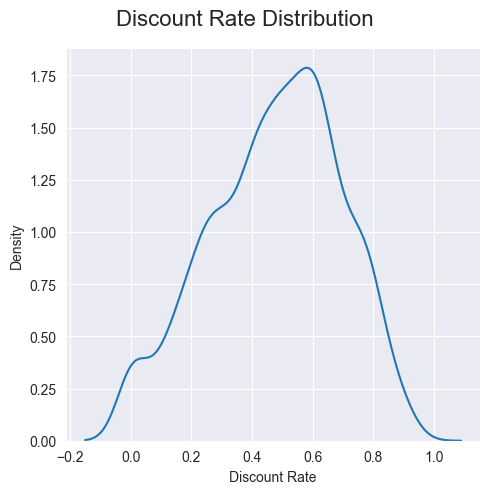

In [ ]:


# Create the KDE plot
plot = sns.displot(data=amazon_df, x="discount_rate", kind="kde")

# Set the axis labels and title 
plot.set_axis_labels('Discount Rate', 'Density')
plot.fig.suptitle('Discount Rate Distribution', fontsize=16)

# Adjust the layout so the title doesn't overlap the plot
plot.fig.subplots_adjust(top=0.9)

# Show the plot
plt.show()

The above diagram is a density plot, representing the distribution of discount_rate. The plot shows a right-skewed distribution:
The peak (highest density) occurs around a discount rate of 0.4 to 0.5, meaning most data points are clustered around this range.
The distribution has a long tail on the right, indicating that there are fewer instances of higher discount rates (closer to 1.0), but they still exist.
There’s a smaller bump around 0.1, suggesting a secondary cluster of data points at lower discount rates.

This distribution suggests that the discount rates in this dataset are most commonly around 0.4 to 0.5, with fewer instances of very low (near 0) or very high (near 1) discount rates. The right skew indicates that while higher discount rates are less common, they are still present, possibly reflecting outliers or a specific subset of the data.







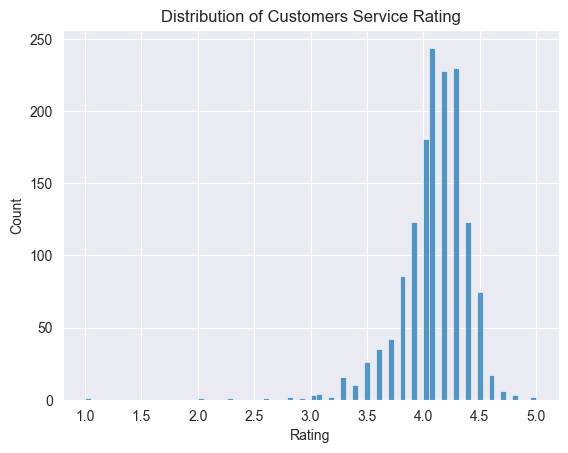

In [58]:
#create hisplot
plot_hist =sns.histplot(data=amazon_df,x="rating")
# create x axis label and title
plot_hist.set_title("Distribution of Customers Service Rating")
plot_hist.set_xlabel('Rating')
# Show the plot
plt.show()

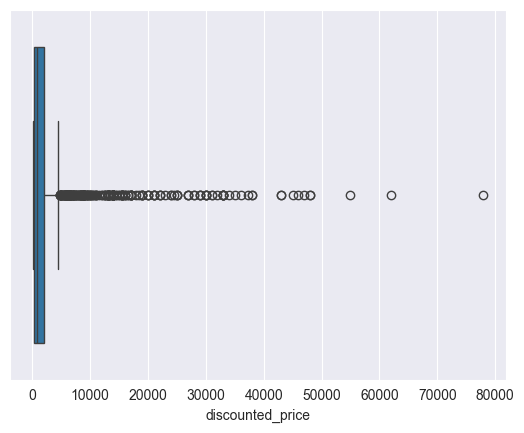

In [70]:
sns.boxplot(data=amazon_df,x='discounted_price')
plt.show()

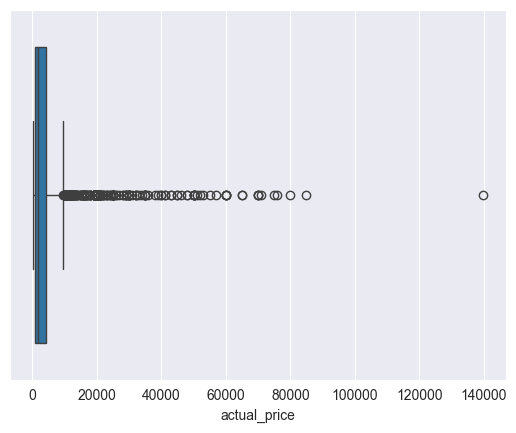

In [68]:
sns.boxplot(data=amazon_df,x='actual_price')
plt.show()

The boxplot above reveals the presence of significant outliers, which are distorting the overall distribution. These extreme values can skew our interpretation of the data, so it's advisable to identify and remove them before conducting further analysis or building models.

#### Removal Of Outliers

In [ ]:
## create a new data_frame with just discounted price and actual price
discounted_price_df = amazon_df.loc[:, ['discounted_price','actual_price']]

In [ ]:
def remove_outliers(col):
    """
    Removes outliers from the specified column of the 'discounted_price_df' DataFrame
    using the Interquartile Range (IQR) method.

    Parameters:
    - col: The name of the column to check for outliers (string)

    Returns:
    - new_df: A DataFrame with outliers removed based on the IQR method
    """

    # Calculate the first quartile (25th percentile)
    q1 = discounted_price_df[col].quantile(0.25)

    # Calculate the third quartile (75th percentile)
    q3 = discounted_price_df[col].quantile(0.75)

    # Calculate the Interquartile Range using imported iqr from scipy.stats
    IQR = iqr(discounted_price_df[col])  

    # Define the upper limit for non-outlier values
    upper_limit = q3 + 1.5 * IQR

    # Define the lower limit for non-outlier values
    lower_limit = q1 - 1.5 * IQR

    # Filter the DataFrame to only include values within the IQR limits
    new_df = discounted_price_df[
        (discounted_price_df[col] < upper_limit) & (discounted_price_df[col] > lower_limit)
    ]

    # Return the filtered DataFrame without outliers
    return new_df

In [26]:
actual_price_df =remove_outliers("actual_price")


In [ ]:
"""
Creates a boxplot using Seaborn.

    Parameters:
    - df: represents the dataframe
    - x: The values to display on the x-axis (typically categorical labels).
    - title: The title of the plot.
    - xlabel: The label for the x-axis.

"""
def plot_boxplot(df,x,title,xlable):
    plot_box=sns.boxplot(data=df,x=x)
    plot_box.set_title(title)
    plot_box.set_xlabel(x)
    plt.show()

''

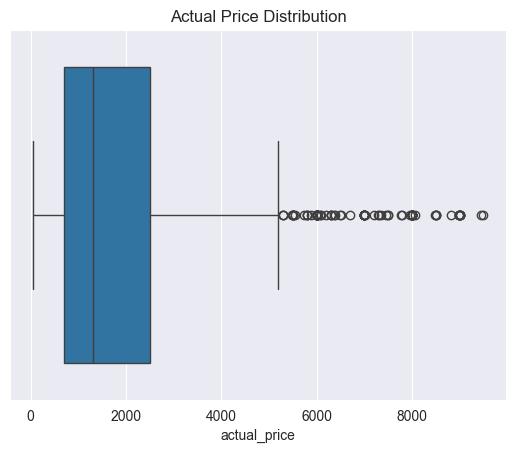

In [64]:
plot_boxplot(actual_price_df,'actual_price','Actual Price Distribution','Actual Price')

In [28]:
discount_df = remove_outliers('discounted_price')

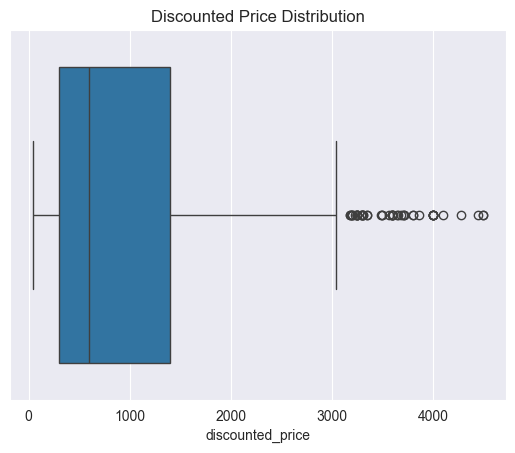

In [65]:
plot_boxplot(discount_df,'discounted_price','Discounted Price Distribution','Discounted Price')

In [ ]:
#Groups the data by product category, counts the number of products in each, sorts them in descending order, and selects the top 10 categories.
category_df =amazon_df.groupby('category')['product_name'].count().sort_values(ascending=False).head(10)

In [31]:
def plot_barplot(index, value, color, title, xlabel):
    """
    Creates a horizontal bar plot using Seaborn.

    Parameters:
    - index: The values to display on the y-axis (typically categorical labels).
    - value: The values to display on the x-axis (typically numeric values).
    - color: The color palette to apply to the bars.
    - title: The title of the plot.
    - xlabel: The label for the x-axis.
    """

    # Create a horizontal bar plot (y = categories, x = values)
    ax = sns.barplot(y=index, x=value, palette=color)

    # Set the title of the plot
    ax.set_title(title)

    # Set the label for the x-axis
    ax.set_xlabel(xlabel)

    # Display the plot
    plt.show()

#### Top 10 product Categories by their number of product

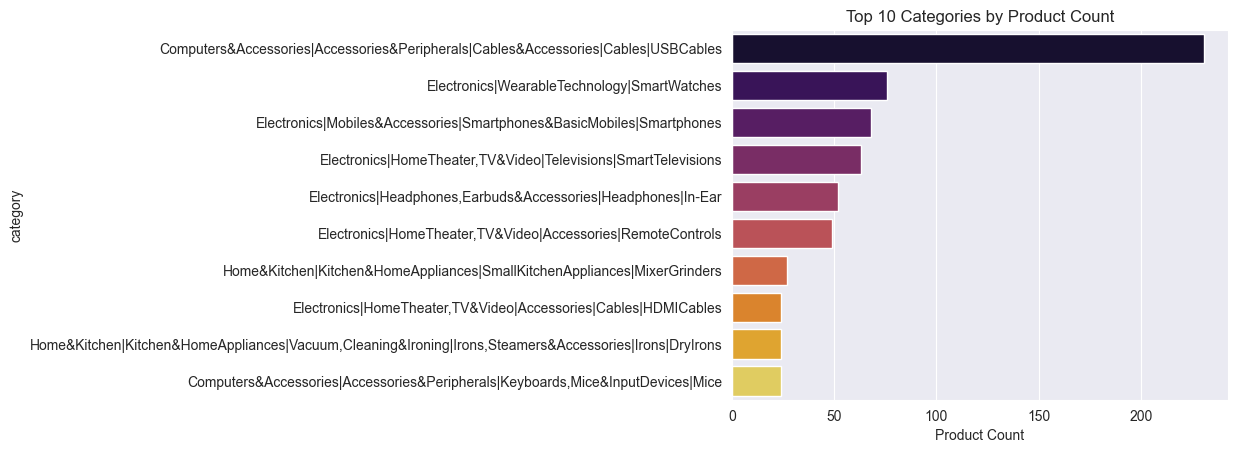

In [32]:
plot_barplot(index=category_df.index,value=category_df.values,color='inferno',title="Top 10 Categories by Product Count",xlabel='Product Count')

The chart shows that USB cables dominate with the highest product count, followed by smart watches and smartphones. Electronics categories (smart TVs, headphones, remote controls, HDMI cables) are prominent, while home and kitchen appliances (mixer grinders, dry irons) have fewer products. This suggests a dataset likely focused on electronics, possibly from an e-commerce platform.



#### Top 10 product Categories by their Average Discount Rate

In [ ]:
#Groups the data by product category by their average discount rate, sorts them in descending order, and selects the top 10 categories.
avg_discount_df = amazon_df.groupby('category')['discount_rate'].mean().sort_values(ascending=False).head(10)
avg_discount_df

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                       0.900
Electronics|Headphones,Earbuds&Accessories|Earpads                                                               0.900
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                              0.900
Electronics|Headphones,Earbuds&Accessories|Adapters                                                              0.880
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    0.875
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts                                       0.820
Computers&Accessories|Components|InternalHardDrives                                                              0.800
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                          0.785
Electronics|Mobiles&Accessories|MobileA

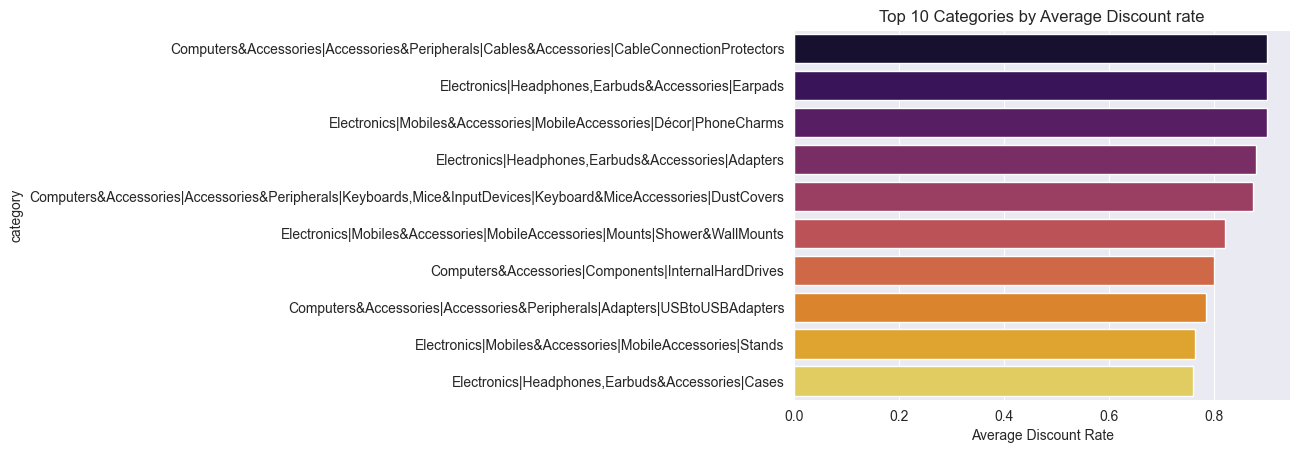

In [34]:
plot_barplot(avg_discount_df.index,avg_discount_df.values,'inferno','Top 10 Categories by Average Discount rate','Average Discount Rate')

#### Top 10 product by their average Ratings

In [77]:
#Groups the data by product name by their respective average ratings, sorts them in descending order, and selects the top 10 categories.
avg_rating_product = amazon_df.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(10)


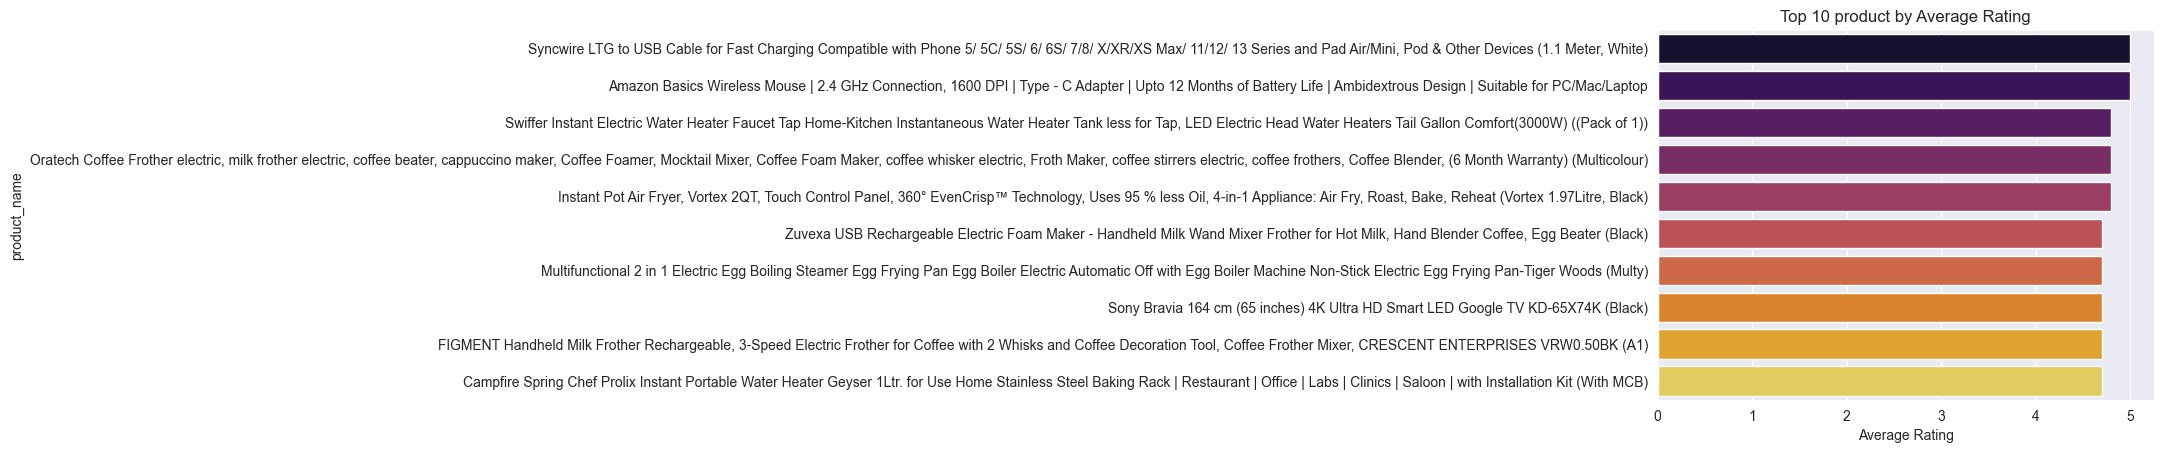

In [36]:
plot_barplot(avg_rating_product.index,avg_rating_product.values,'inferno','Top 10 product by Average Rating','Average Rating')

In [85]:
avg_rating_categories = amazon_df.groupby('category')['rating'].mean().sort_values(ascending=False).head(10)
avg_rating_categories

category
Computers&Accessories|Tablets                                                                 4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                      4.5
Electronics|Cameras&Photography|Accessories|Film                                              4.5
Computers&Accessories|Components|Memory                                                       4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                  4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                            4.5
HomeImprovement|Electrical|CordManagement                                                     4.5
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeePresses                         4.5
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories    4.5
Electronics|PowerAccessories|SurgeProtectors                                                  4.5
Name: ratin

In [ ]:
plot_barplot(avg_rating_categories.index,avg_rating_categories.values,'Greens_r','Top 10 categories by Average Rating','Average Rating')

#### Relationship Between Discount Rate and Customers Ratings

In [ ]:
# Filter numeric field
numeric_df = amazon_df.select_dtypes(np.number)


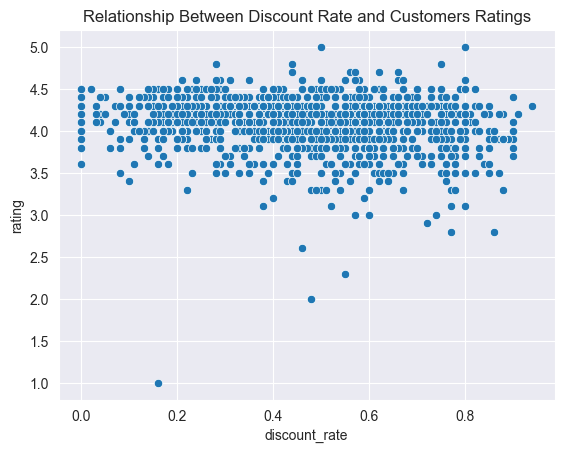

In [89]:
plot_scatter=sns.scatterplot(data=amazon_df,x='discount_rate', y='rating')
plot_scatter.set_title("Relationship Between Discount Rate and Customers Ratings")
plt.show()

Insights:

Majority of ratings cluster between 4.0 and 5.0, regardless of discount rate.

A few outliers exist with very low ratings (as low as 1.0), but they’re relatively rare.

There doesn’t seem to be a strong correlation between discount rate and rating — increasing the discount doesn’t consistently lead to higher or lower ratings.

That said, heavily discounted products (above 0.6) still tend to maintain high ratings.

 Conclusion: Customers generally give good ratings regardless of how much discount a product has. Discounts may not strongly influence satisfaction (as measured by ratings).

##  Review Sentiment Analysis

In [39]:
review_df = amazon_df[['review_title','review_content','rating']]

In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from PIL import Image, ImageOps
from wordcloud import WordCloud,STOPWORDS

In [ ]:
analyser = SentimentIntensityAnalyzer()
review_df['vader_scores'] = review_df['review_content'].apply(lambda x: analyser.polarity_scores(str(x)))
review_df = pd.concat([review_df,review_df['vader_scores'].apply(pd.Series)],axis=1)
review_df

In [44]:
review_df

,review_title,review_content,rating,vader_scores,neg,neu,pos,compound
0,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,4.2,"{'neg': 0.031, 'neu': 0.754, 'pos': 0.215, 'co...",0.031,0.754,0.215,0.8974
1,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,4.0,"{'neg': 0.01, 'neu': 0.83, 'pos': 0.16, 'compo...",0.010,0.830,0.160,0.9853
2,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",3.9,"{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'comp...",0.000,0.651,0.349,0.7089
3,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",4.2,"{'neg': 0.027, 'neu': 0.807, 'pos': 0.165, 'co...",0.027,0.807,0.165,0.8316
4,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",4.2,"{'neg': 0.084, 'neu': 0.725, 'pos': 0.191, 'co...",0.084,0.725,0.191,0.9955
...,...,...,...,...,...,...,...,...
1460,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",4.0,"{'neg': 0.044, 'neu': 0.742, 'pos': 0.214, 'co...",0.044,0.742,0.214,0.9390
1461,"ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",4.1,"{'neg': 0.09, 'neu': 0.736, 'pos': 0.174, 'com...",0.090,0.736,0.174,0.9473
1462,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",3.6,"{'neg': 0.081, 'neu': 0.727, 'pos': 0.192, 'co...",0.081,0.727,0.192,0.9682
1463,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,4.0,"{'neg': 0.06, 'neu': 0.884, 'pos': 0.056, 'com...",0.060,0.884,0.056,-0.2960


In [ ]:
"""
    Create a new field(Vader sentiment) that classifies customer's review sentiment score into Positive, Negative and Neutral

    Parameters:
    - compound = represents the column Compound
    - Positive = Compound > 0.05 
    - Negative = Compound < 0
    - Neutrsl = Compound < 0.05 
"""
def get_sentiment(compound):
    if compound > 0.5:
        return "Positive"
    elif compound < 0:
        return "Negative"
    else:
        return "Neutral"
review_df['vader_sentiment'] =review_df['compound'].apply(get_sentiment)

''

In [46]:
review_df

,review_title,review_content,rating,vader_scores,neg,neu,pos,compound,vader_sentiment
0,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,4.2,"{'neg': 0.031, 'neu': 0.754, 'pos': 0.215, 'co...",0.031,0.754,0.215,0.8974,Positive
1,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,4.0,"{'neg': 0.01, 'neu': 0.83, 'pos': 0.16, 'compo...",0.010,0.830,0.160,0.9853,Positive
2,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",3.9,"{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'comp...",0.000,0.651,0.349,0.7089,Positive
3,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",4.2,"{'neg': 0.027, 'neu': 0.807, 'pos': 0.165, 'co...",0.027,0.807,0.165,0.8316,Positive
4,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",4.2,"{'neg': 0.084, 'neu': 0.725, 'pos': 0.191, 'co...",0.084,0.725,0.191,0.9955,Positive
...,...,...,...,...,...,...,...,...,...
1460,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",4.0,"{'neg': 0.044, 'neu': 0.742, 'pos': 0.214, 'co...",0.044,0.742,0.214,0.9390,Positive
1461,"ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",4.1,"{'neg': 0.09, 'neu': 0.736, 'pos': 0.174, 'com...",0.090,0.736,0.174,0.9473,Positive
1462,"very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",3.6,"{'neg': 0.081, 'neu': 0.727, 'pos': 0.192, 'co...",0.081,0.727,0.192,0.9682,Positive
1463,"Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,4.0,"{'neg': 0.06, 'neu': 0.884, 'pos': 0.056, 'com...",0.060,0.884,0.056,-0.2960,Negative


In [ ]:
#Counts how many reviews fall under each sentiment category: Positive, Negative, or Neutral.
sentiment_count = review_df['vader_sentiment'].value_counts()
sentiment_count

vader_sentiment
Positive    1335
Neutral       64
Negative      64
Name: count, dtype: int64

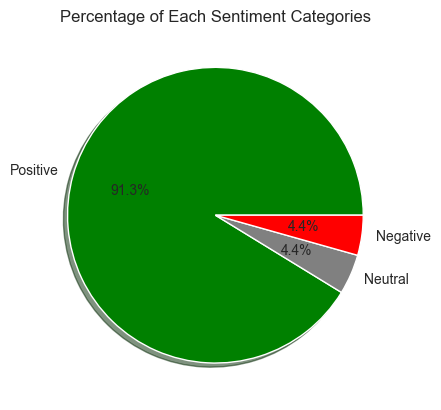

In [76]:
# Create a pie-chart to show the repective percentage of each category
plt.pie(sentiment_count,labels=sentiment_count.index,autopct="%1.1f%%",shadow=True,colors=["Green","Grey",'Red'])
plt.title('Percentage of Each Sentiment Categories')
plt.show()

Insights:

* A very high percentage (91.3%) of the product reviews are positive.

* Very few users left neutral or negative reviews, both under 5%.

Conclusion: The overall customer sentiment is extremely positive — customers are happy with the products and/or services. This is a good indicator of product quality and customer satisfaction.



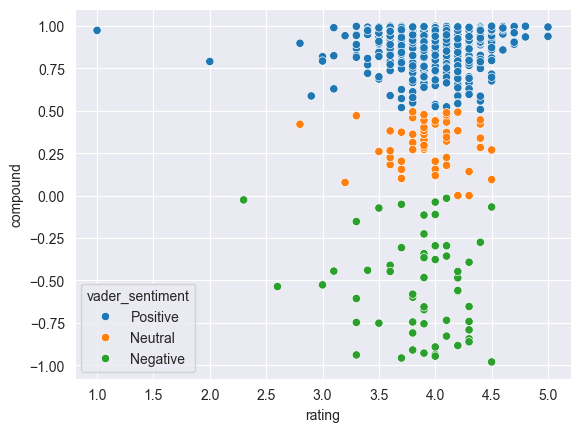

In [49]:
sns.scatterplot(data=review_df,x='rating', y='compound',hue='vader_sentiment')
plt.show()

#### Most Popular words Associated with customer Reviews

In [50]:
meta_image = Image.open("ChatGPT Image Apr 16, 2025, 04_16_37 PM.png")
meta_image = ImageOps.invert(meta_image)
meta_mask =np.array(meta_image)
stopwords = set(STOPWORDS)

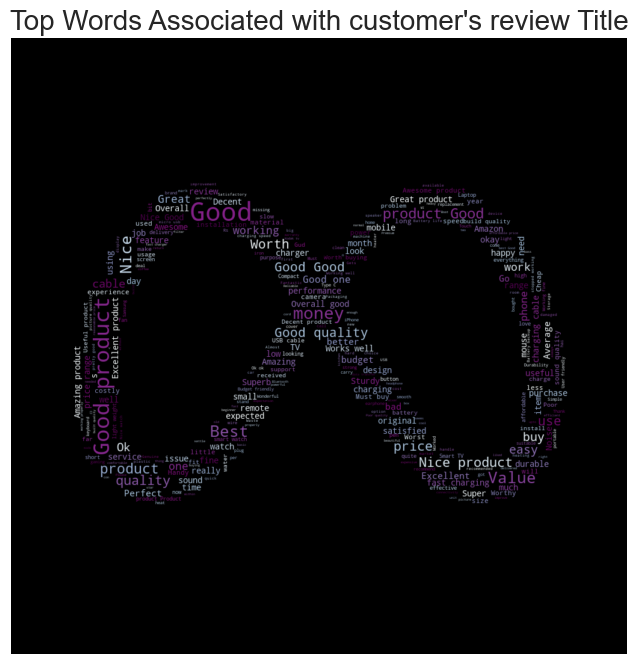

In [ ]:
text = " ".join(review for review in review_df['review_title'])

# Generate the WordCloud
wordcloud = WordCloud(
    stopwords=stopwords,
    mask=meta_mask,
    contour_color='black',
    contour_width=2,
    colormap='BuPu_r',
    background_color='black',
    max_words=300,
    width=500,
    height=500
).generate(text)

# create a word cloud graph
plt.figure(figsize=(12, 8))  # <-- Note the lowercase `f` and proper call
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words Associated with customer's review Title", fontsize=20)
plt.show()

In [53]:
apple_image = Image.open('ChatGPT Image Apr 16, 2025, 04_37_18 PM.png').convert('L')
# apple_image = ImageOps.invert(apple_image)
threshold = 240
apple_array = np.array(apple_image)
apple_mask = np.where(apple_array > threshold,255,0).astype(np.uint8)

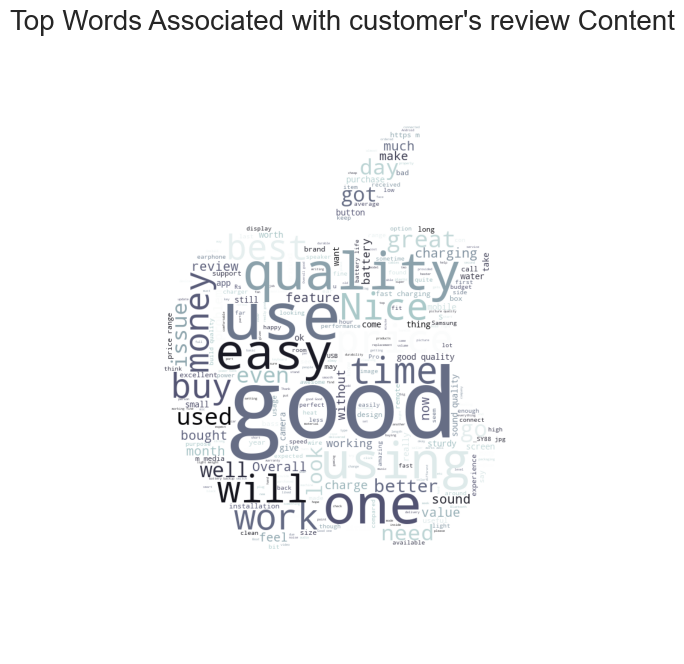

In [88]:
stop_words = set(STOPWORDS)
stopwords.update(['laptop','mouse','TV','Cable','Amazon','watch','phone','device','product'])
text = "".join(review for review in review_df['review_content'])
wc = WordCloud(stopwords=stopwords, background_color='white',mask=apple_mask,contour_width=1.5,contour_color="white",colormap='bone', max_words=300).generate(text)
### Craete a wordcloud graph
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.title("Top Words Associated with customer's review Content", fontsize=20)
plt.show()

<a id="#Conclusion"></a>

### Conclusion


Based on the analysis of the Amazon review dataset, several key insights were uncovered:

* Sentiment Reflects Product Satisfaction:
Sentiment analysis revealed a strong correlation between positive review titles and contents with higher product ratings. Products receiving a greater number of positive reviews tend to have elevated overall ratings, suggesting that user-generated content can serve as a reliable proxy for product quality.

* Rating vs. Discount Influence:
Interestingly, customers generally provided good ratings regardless of the discount offered. This suggests that discounts may not significantly influence perceived satisfaction, as reflected in customer ratings.

* Category-wise Engagement Trends:
Certain product categories, such as Computers & Accessories | Tablets, garnered higher review volumes and user engagement. This can likely be attributed to the personal relevance and frequent usage of such items, which tend to elicit more customer feedback.

* Textual Insights Provide Deeper Understanding:
Through word clouds and keyword analysis of review titles and contents, recurring themes such as "quality," "good," and "easy" emerged. These highlight customer priorities and concerns that are not always captured through numeric ratings alone.

* The Importance of Data Cleaning:
The preprocessing stage revealed inconsistencies in data formats (e.g., prices stored as strings), emphasizing the critical role of data cleaning in ensuring the accuracy and reliability of insights.

* Conclusion
This analysis underscores the immense value of customer reviews, both as feedback mechanisms and as rich sources of insight. It also demonstrates how leveraging review data can inform product development, optimize marketing strategies, and enhance customer experiences on e-commerce platforms like Amazon

